In [1]:
import scanpy as sc
import pandas as pd
adata= sc.read_h5ad("test_expand_cp_pred.h5ad")

In [2]:
adata.X=adata.layers['pred']

In [4]:
compound_file = r'/path/to/l1000/compoundinfo_beta.txt'
compound_df = pd.read_csv(compound_file, sep='\t', header=0)  

moa_mapping = dict(zip(compound_df['canonical_smiles'], compound_df['moa']))  
target_mapping = dict(zip(compound_df['canonical_smiles'], compound_df['target']))  
pert_id_mapping = dict(zip(compound_df['canonical_smiles'], compound_df['pert_id']))  
cmap_name_mapping = dict(zip(compound_df['canonical_smiles'], compound_df['cmap_name']))  
compound_aliases_mapping = dict(zip(compound_df['canonical_smiles'], compound_df['compound_aliases']))  
inchi_key_mapping = dict(zip(compound_df['canonical_smiles'], compound_df['inchi_key']))  

adata.obs['moa']=adata.obs['smiles'].map(moa_mapping)
adata.obs['target']=adata.obs['smiles'].map(target_mapping)
adata.obs['pert_id']=adata.obs['smiles'].map(pert_id_mapping)
adata.obs['cmap_name']=adata.obs['smiles'].map(cmap_name_mapping)
adata.obs['compound_aliases']=adata.obs['smiles'].map(compound_aliases_mapping)
adata.obs['inchi_key']=adata.obs['smiles'].map(inchi_key_mapping)



In [5]:
adata = adata[~adata.obs['cell'].str.contains('XC', na=False)]


print(adata.obs.head())


  cell        drug                       moa  target        pert_id  \
0  PC3   ibrutinib             BTK inhibitor     BTK  BRD-A35869383   
1  PC3   masitinib           PDGFR inhibitor  PDGFRB  BRD-K71035033   
2  PC3  PD-0325901  Protein kinase inhibitor  MAP2K1  BRD-A50454580   
3  PC3  tozasertib   Aurora kinase inhibitor   AURKB  BRD-K87947369   
4  PC3   gefitinib            EGFR inhibitor    EGFR  BRD-K64052750   

                                              smiles compound_aliases  \
0  Nc1ncnc2n(nc(-c3ccc(Oc4ccccc4)cc3)c12)C1CCCN(C...              NaN   
1  CN1CCN(Cc2ccc(cc2)C(=O)Nc2ccc(C)c(Nc3nc(cs3)-c...              NaN   
2          OCC(O)CONC(=O)c1ccc(F)c(F)c1Nc1ccc(I)cc1F              NaN   
3  CN1CCN(CC1)c2cc(Nc3cc(C)n[nH]3)nc(Sc4ccc(NC(=O...              NaN   
4     COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCOCC1              NaN   

                     inchi_key   cmap_name  
0  XYFPWWZEPKGCCK-UHFFFAOYSA-N   ibrutinib  
1  WJEOLQLKVOPQFV-UHFFFAOYSA-N   masitinib  

In [6]:
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

/slurm/home/yrd/liaolab/lvtianhang/anaconda3/envs/single-cell/lib/python3.9/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


In [5]:
sc.settings.verbosity = 0
sc.settings.set_figure_params(dpi=80, facecolor="white", frameon=False)

In [8]:
tissue_file = r'cell_tissue.sort_color.txt'  
tissue_df = pd.read_csv(tissue_file, sep=',', header=None, names=['cell', 'tissue', 'color'])


cell_to_tissue = dict(zip(tissue_df['cell'], tissue_df['tissue']))
adata.obs['tissue'] = adata.obs['cell'].map(cell_to_tissue)

/slurm/home/yrd/liaolab/lvtianhang/anaconda3/envs/single-cell/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


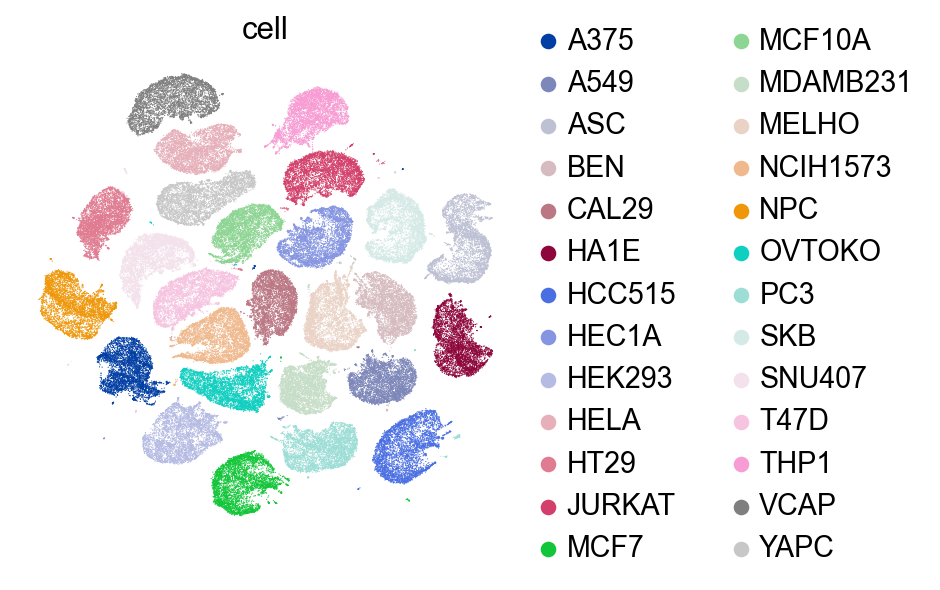

In [9]:
sc.pl.umap(adata, color=['cell'], save='cell.pdf')

In [10]:
adata.write_h5ad("test_expand_cp_pred_plot.h5ad")

In [1]:
import scanpy as sc
import pandas as pd

In [2]:
adata = sc.read_h5ad("test_expand_cp_pred_plot.h5ad")

In [3]:
adata.obs

,cell,drug,moa,target,pert_id,smiles,compound_aliases,inchi_key,cmap_name,tissue
0,PC3,ibrutinib,BTK inhibitor,BTK,BRD-A35869383,Nc1ncnc2n(nc(-c3ccc(Oc4ccccc4)cc3)c12)C1CCCN(C...,NaN,XYFPWWZEPKGCCK-UHFFFAOYSA-N,ibrutinib,prostate
1,PC3,masitinib,PDGFR inhibitor,PDGFRB,BRD-K71035033,CN1CCN(Cc2ccc(cc2)C(=O)Nc2ccc(C)c(Nc3nc(cs3)-c...,NaN,WJEOLQLKVOPQFV-UHFFFAOYSA-N,masitinib,prostate
2,PC3,PD-0325901,Protein kinase inhibitor,MAP2K1,BRD-A50454580,OCC(O)CONC(=O)c1ccc(F)c(F)c1Nc1ccc(I)cc1F,NaN,SUDAHWBOROXANE-UHFFFAOYSA-N,PD-0325901,prostate
3,PC3,tozasertib,Aurora kinase inhibitor,AURKB,BRD-K87947369,CN1CCN(CC1)c2cc(Nc3cc(C)n[nH]3)nc(Sc4ccc(NC(=O...,NaN,GCIKSSRWRFVXBI-UHFFFAOYSA-N,tozasertib,prostate
4,PC3,gefitinib,EGFR inhibitor,EGFR,BRD-K64052750,COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCN1CCOCC1,NaN,XGALLCVXEZPNRQ-UHFFFAOYSA-N,gefitinib,prostate
...,...,...,...,...,...,...,...,...,...,...
115564,BEN,BG-1028,NaN,NaN,BRD-K85732814,ONC(=O)CCCCCC(=O)NN=Cc1ccc(cc1)-c1cccs1,NaN,MSBSKEZZBZJPHP-CPNJWEJPSA-N,BG-1028,bladder
115565,BEN,BG-1027,NaN,NaN,BRD-K97869369,ONC(=O)CCCCCC(=O)NN=Cc1ccc(cc1)-c1cncnc1,NaN,IMLRCIJPRAFHAV-UFFVCSGVSA-N,BG-1027,bladder
115567,BEN,SA-25547,NaN,NaN,BRD-K96076993,CC/1=NNC(=O)C1=C/c2cn(nc2c3ccc(F)cc3)c4ccccc4,NaN,NYSNWKVZPJLWBH-WQRHYEAKSA-N,SA-25547,bladder
115568,BEN,BG-1025,NaN,NaN,BRD-K46918889,ONC(=O)CCCCCC(=O)NN=Cc1ccc(cc1)-c1ccncc1,NaN,DZJZQNLBLZSWDQ-KGENOOAVSA-N,BG-1025,bladder


/slurm/home/yrd/liaolab/lvtianhang/anaconda3/envs/single-cell/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


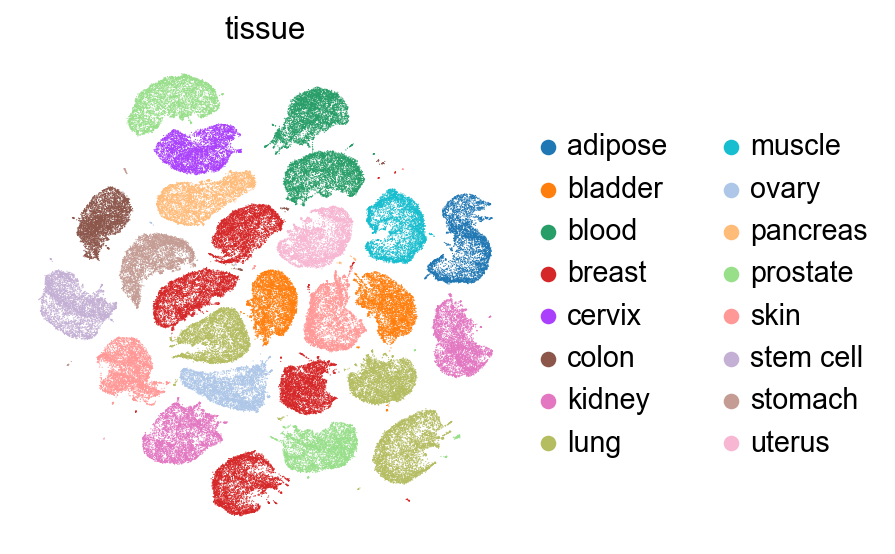

In [6]:
sc.pl.umap(adata, color=['tissue'], save='tissue.pdf')